In [20]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


d:\apps\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [21]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print X_iris.shape, y_iris.shape
print X_iris[0], y_iris[0]

(150L, 4L) (150L,)
[5.1 3.5 1.4 0.2] 0


In [23]:
print iris.feature_names
print iris.target_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Get dataset with only the first two attributes
X, y = X_iris[:,:2], y_iris
# Split the dataset into a trainig and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print X_train.shape, y_train.shape
# Standarize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

(112L, 2L) (112L,)


Text(0,0.5,'Sepal width')

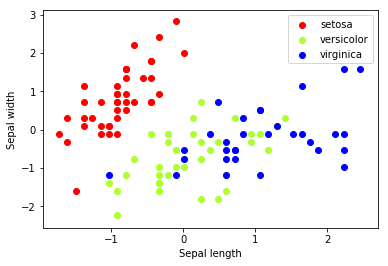

In [25]:
colors = ['red', 'greenyellow', 'blue']
for i in xrange(len(colors)):
    px = X_train[:, 0][y_train == i]
    py = X_train[:, 1][y_train == i]
    plt.scatter(px, py, c=colors[i])

plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [26]:
# create the linear model classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
# fit (train) the classifier
clf.fit(X_train, y_train)
# print learned coeficients
print clf.coef_
print clf.intercept_

[[-26.9518696   17.03102977]
 [  5.33713566 -17.03102977]
 [ 24.47629047   0.75101269]]
[-12.47278608   4.07015763 -10.41485533]


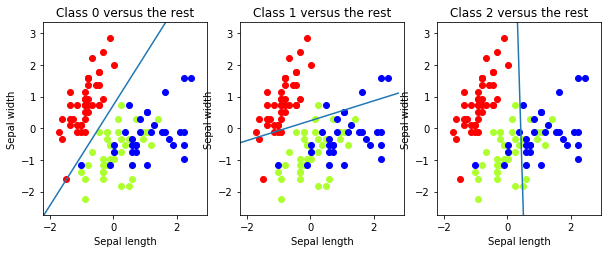

In [29]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min,x_max,0.5)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10,6)
for i in [0,1,2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class ' + str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    sca(axes[i])
    for j in xrange(len(colors)):
        px = X_train[:, 0][y_train == j]
        py = X_train[:, 1][y_train == j]
        plt.scatter(px, py, c=colors[j])
    ys = (-clf.intercept_[i]-xs*clf.coef_[i,0])/clf.coef_[i,1]
    plt.plot(xs,ys)

In [30]:
print clf.predict(scaler.transform([[4.7, 3.1]]))
print clf.decision_function(scaler.transform([[4.7, 3.1]]))

[0]
[[ 23.08123143  -4.2600709  -41.17186704]]


In [31]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print metrics.accuracy_score(y_train, y_train_pred)

0.8125


In [33]:
y_pred = clf.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.6842105263157895


In [34]:
print metrics.classification_report(y_test, y_pred, target_names=iris.target_names)
print metrics.confusion_matrix(y_test, y_pred)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.47      0.73      0.57        11
  virginica       0.77      0.53      0.62        19

avg / total       0.73      0.68      0.69        38

[[ 8  0  0]
 [ 0  8  3]
 [ 0  9 10]]


In [35]:
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.pipeline import Pipeline

# create a composite estimator made by a pipeline of the standarization and the linear model
clf = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_model', SGDClassifier())
])
# create a k-fold croos validation iterator of k=5 folds
cv = KFold(X.shape[0], 5, shuffle=True, random_state=33)
# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf, X, y, cv=cv)
print scores


[0.53333333 0.73333333 0.76666667 0.56666667 0.83333333]


In [36]:
from scipy.stats import sem

def mean_score(scores):
    """Print the empirical mean score and standard error of the mean."""
    return ("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores))

print mean_score(scores)

Mean score: 0.687 (+/-0.058)


In [46]:
xx = X_train[:,0] [y_train==2]

In [47]:
print xx

[ 2.45882905  0.83205945  0.01867465  2.22643339  0.59966379  1.64544425
  1.8778399   1.18065293  0.71586162 -0.09752318  0.36726814  0.71586162
  1.64544425  2.11023556  0.83205945  0.59966379  0.71586162  1.29685076
  0.59966379  1.06445511  2.22643339  1.76164208  1.06445511  1.06445511
 -1.0271058   0.48346596  2.22643339  0.01867465  1.52924642  0.59966379
  2.22643339]


In [48]:
print xx[0]

2.4588290456829496


In [49]:
print len(colors)

3


In [ ]:
c